# Ch1:Bike Sharing Analysis

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Import data

In [2]:
hour_df = pd.read_csv("data\hour.csv")
day_df = pd.read_csv("data\day.csv")

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Some statistics about the data

In [5]:
print(f"The shape of hourly data: {hour_df.shape}")
print(f"The number of missing values of hourly data: {hour_df.isnull().sum().sum()}")
print(f"The shape of daily data: {day_df.shape}")
print(f"The number of missing values of daily data: {day_df.isnull().sum().sum()}")

The shape of hourly data: (17379, 17)
The number of missing values of hourly data: 0
The shape of daily data: (731, 16)
The number of missing values of daily data: 0


In [6]:
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [7]:
day_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


## Data Preprocessing

Changing season names as this (1:winter, 2:spring, 3:summer, 4:fall) "From ReadME file"

In [8]:
season_map = {1:'winter', 2:'spring', 3:'summer', 4:'fall'}
hour_df['season'] = hour_df['season'].apply(lambda x: season_map[x])

Changing yr as this (0: 2011, 1:2012) "From ReadME file"

In [9]:
year_map = {0: 2011 , 1:2012}
hour_df['yr'] = hour_df['yr'].apply(lambda x: year_map[x])

Changing weekday as this (0: Sunday , 1: Monday , .....) "From ReadME file"

In [10]:
day_map = {0: 'Sunday' , 1:'Monday' , 2:'Tuesday' , 3:'Wednesday' , 4:'Thursday' , 5:'Friday' , 6:'Saturday'}
hour_df['weekday'] = hour_df['weekday'].apply(lambda x: day_map[x])

Changing weathersit as this (1: Clear , 2: Cloudy , 3: Light Snow Rain , 4: Heavy Snow Rain) "From ReadME file"

In [11]:
weathersit_map = {1: 'clear' , 2: 'cloudy' , 3: 'light snow rain' , 4: 'heavy snow rain'}
hour_df['weathersit'] = hour_df['weathersit'].apply(lambda x: weathersit_map[x])

Changing temp, atemp, hum & windspeed "From ReadME file"

In [12]:
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

In [13]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,9.84,14.395,75.0,0.0,0,1,1


Check if sum of casual & registered equal cnt or not

In [14]:
assert (hour_df['casual'] + hour_df['registered'] == hour_df['cnt']).all()

## Registered vs casual use analysis

C:\Users\BlueMoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BlueMoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


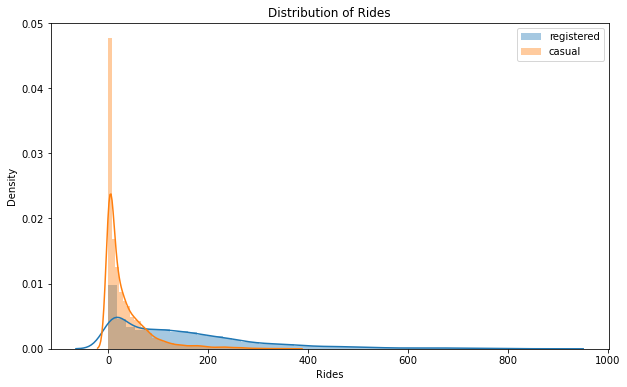

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(hour_df['registered'],label='registered')
sns.distplot(hour_df['casual'],label='casual')
plt.legend()
plt.title('Distribution of Rides')
plt.xlabel('Rides');

We can easily see that registered users perform more than casual and the data is right skewed.

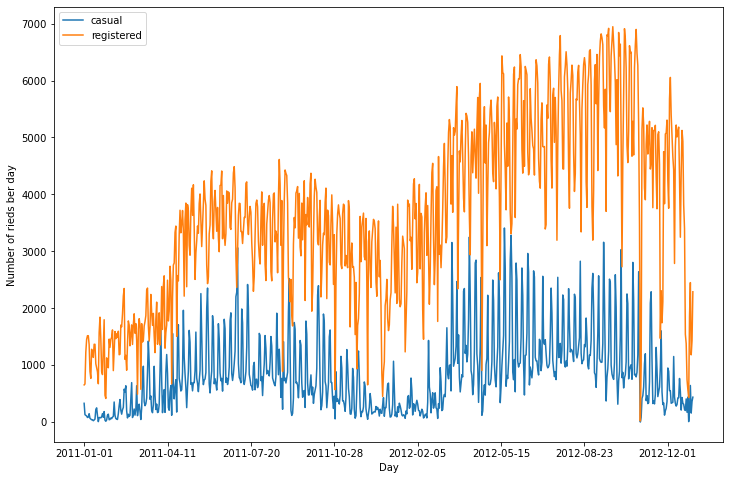

In [16]:
grouped_data = hour_df.groupby('dteday').sum()[['casual','registered']]
grouped_data.plot(figsize=(12,8))
plt.xlabel('Day')
plt.ylabel('Number of rieds ber day');

The number of registered rides is always higher and above casual rides. 

Let's smooth the curve....

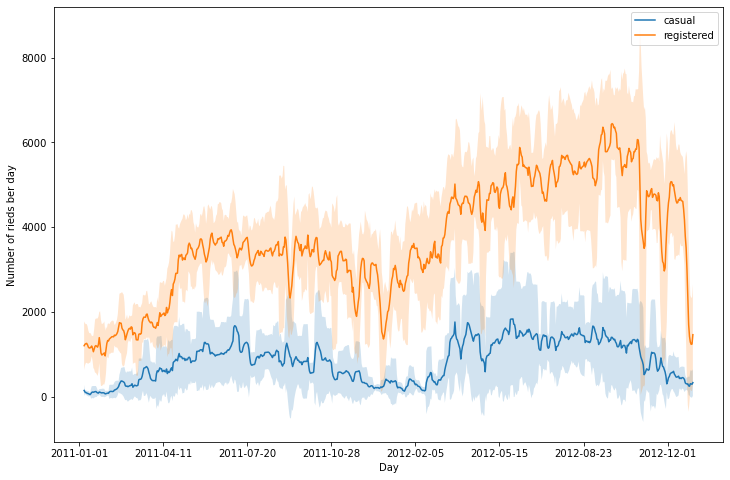

In [17]:
rolling_mean=grouped_data.rolling(7).mean()
rolling_std=grouped_data.rolling(7).std()
ax = rolling_mean.plot(figsize=(12,8))
ax.fill_between(rolling_mean.index, rolling_mean['casual']+1.5 * rolling_std['casual']\
                , rolling_mean['casual']-1.5 * rolling_std['casual'],alpha=0.2)
ax.fill_between(rolling_mean.index, rolling_mean['registered']+1.5 * rolling_std['registered']\
                , rolling_mean['registered']-1.5 * rolling_std['registered'],alpha=0.2)
plt.xlabel('Day')
plt.ylabel('Number of rieds ber day');

Let's focus on the distribution over the weekdays

In [18]:
plot_data = hour_df[['hr','weekday','registered','casual']].melt(id_vars=['hr','weekday'])
plot_data

,hr,weekday,variable,value
0,0,Saturday,registered,13
1,1,Saturday,registered,32
2,2,Saturday,registered,27
3,3,Saturday,registered,10
4,4,Saturday,registered,1
...,...,...,...,...
34753,19,Monday,casual,11
34754,20,Monday,casual,8
34755,21,Monday,casual,7
34756,22,Monday,casual,13


C:\Users\BlueMoon\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


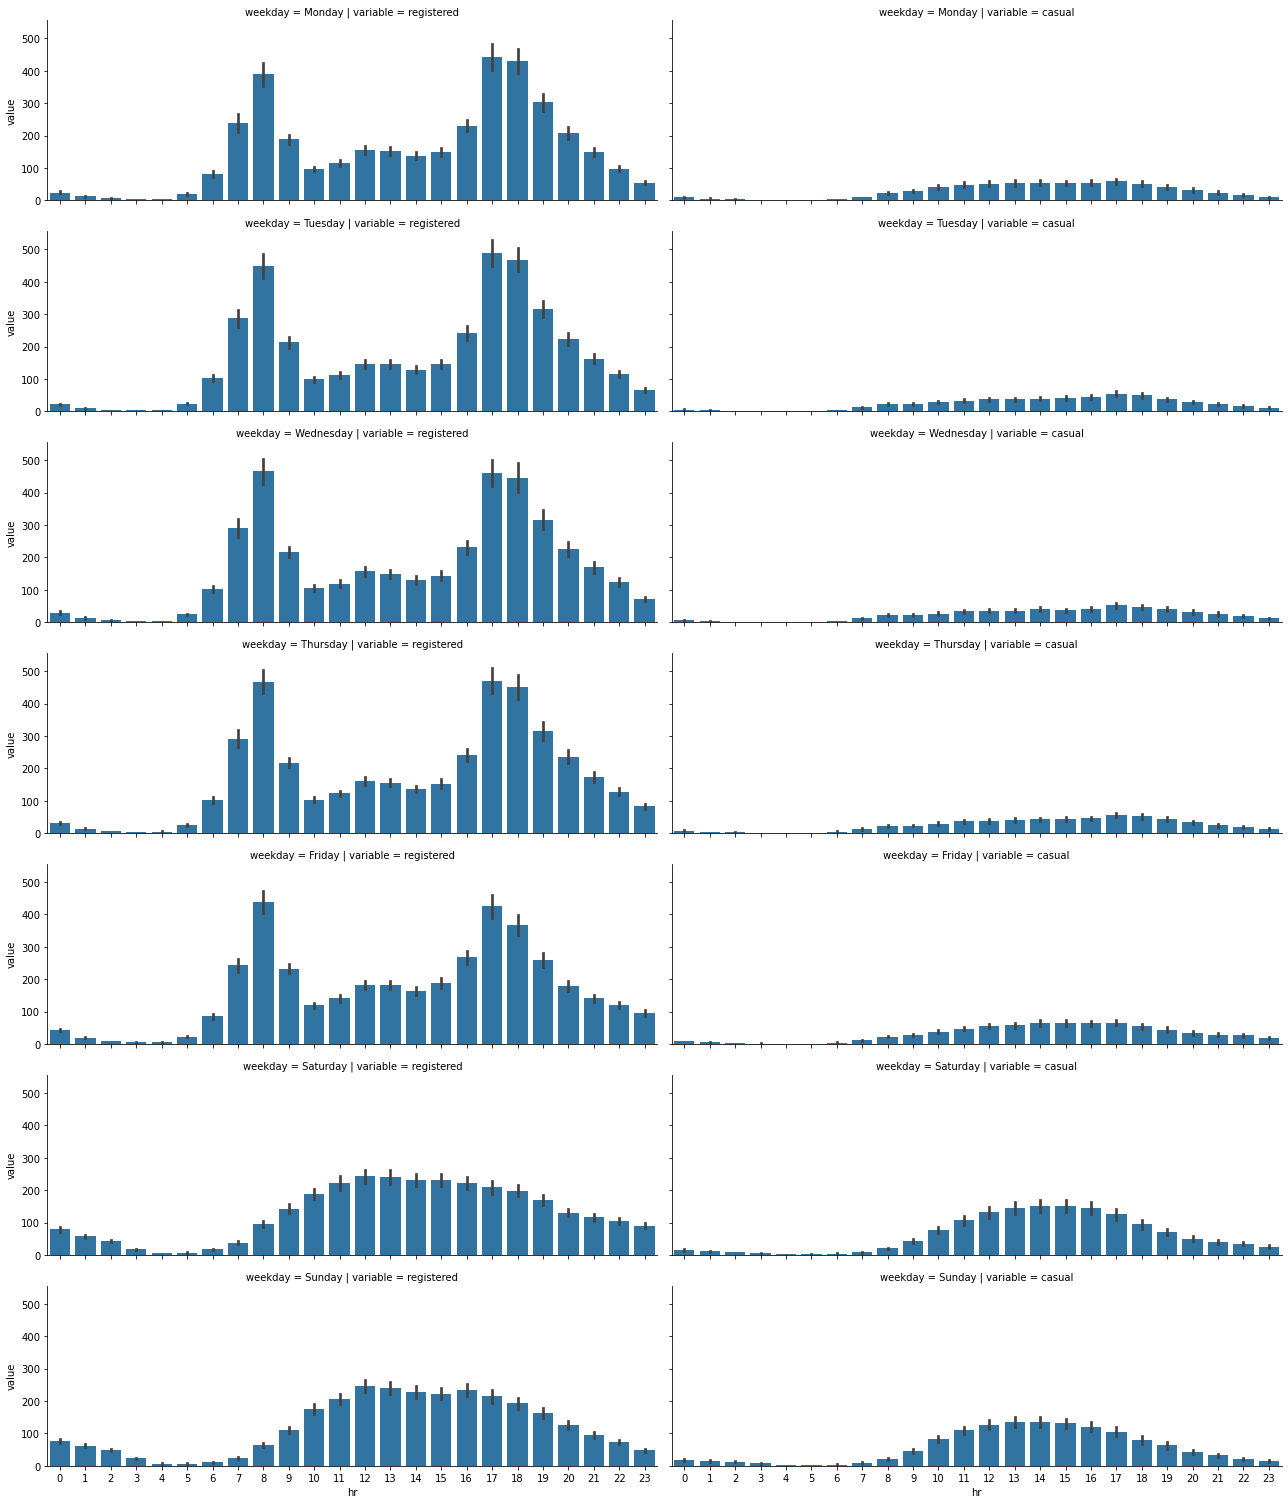

In [19]:
grid = sns.FacetGrid(plot_data,row='weekday',col='variable',aspect=3,\
                     row_order=['Monday', 'Tuesday','Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
grid.map(sns.barplot,'hr','value');

On working days we can note that registered riders place around 8 AM and at 6 PM.
On the other hand, casual users use bikes mostly at weekends.

As a conclusion, we could claim that most of the usage of bike sharing services occurs during working days, right before and right after the standard working time (that is, 9 to 5)

In [20]:
plot_data = hour_df[['hr','season','registered','casual']].melt(id_vars=['hr','season'])
plot_data

,hr,season,variable,value
0,0,winter,registered,13
1,1,winter,registered,32
2,2,winter,registered,27
3,3,winter,registered,10
4,4,winter,registered,1
...,...,...,...,...
34753,19,winter,casual,11
34754,20,winter,casual,8
34755,21,winter,casual,7
34756,22,winter,casual,13


C:\Users\BlueMoon\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


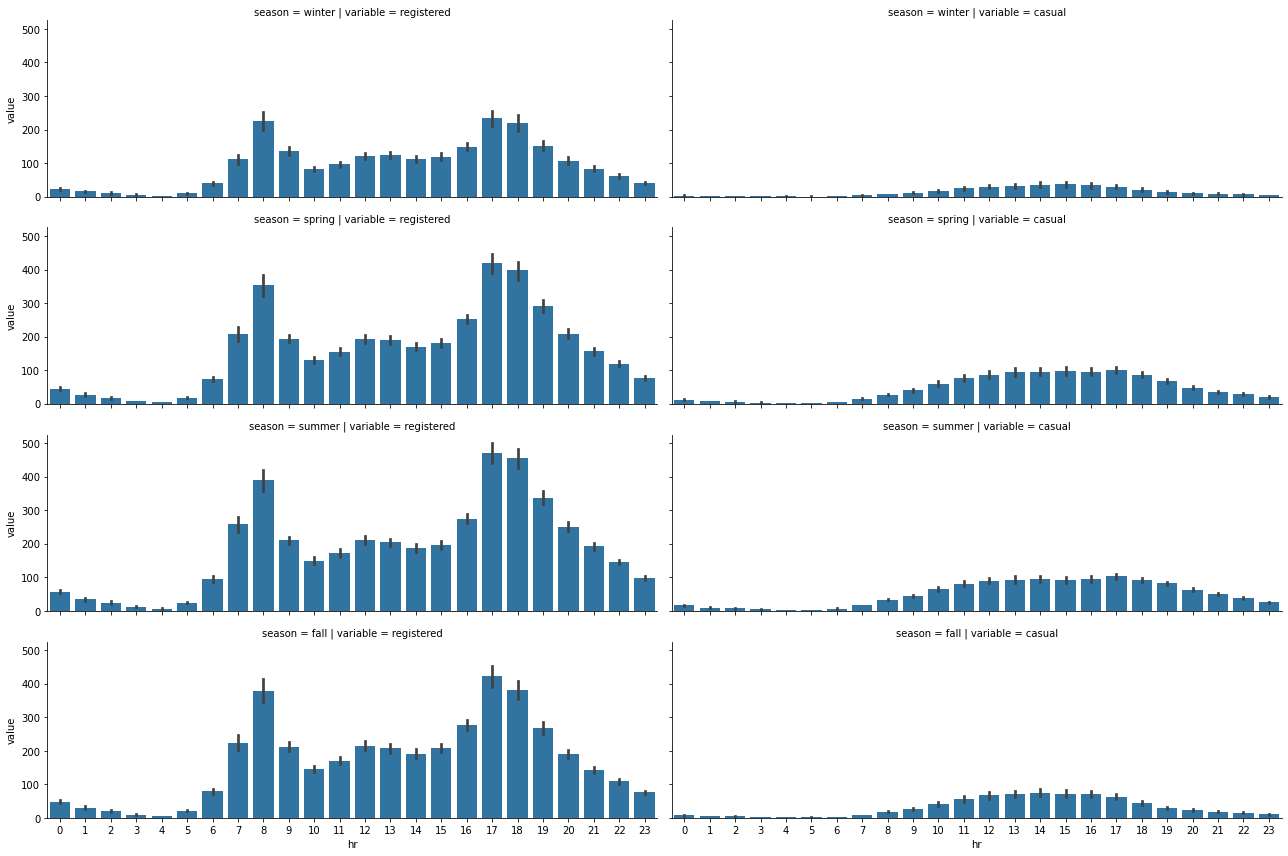

In [21]:
grid = sns.FacetGrid(plot_data,row='season',col='variable',aspect=3,\
                     row_order=['winter', 'spring','summer', 'fall'])
grid.map(sns.barplot,'hr','value');

We can see the all seasons have the same graph except winter has the lower values.

In [22]:
plot_data = hour_df[['weekday','season','registered','casual']].melt(id_vars=['weekday','season'])
plot_data

,weekday,season,variable,value
0,Saturday,winter,registered,13
1,Saturday,winter,registered,32
2,Saturday,winter,registered,27
3,Saturday,winter,registered,10
4,Saturday,winter,registered,1
...,...,...,...,...
34753,Monday,winter,casual,11
34754,Monday,winter,casual,8
34755,Monday,winter,casual,7
34756,Monday,winter,casual,13


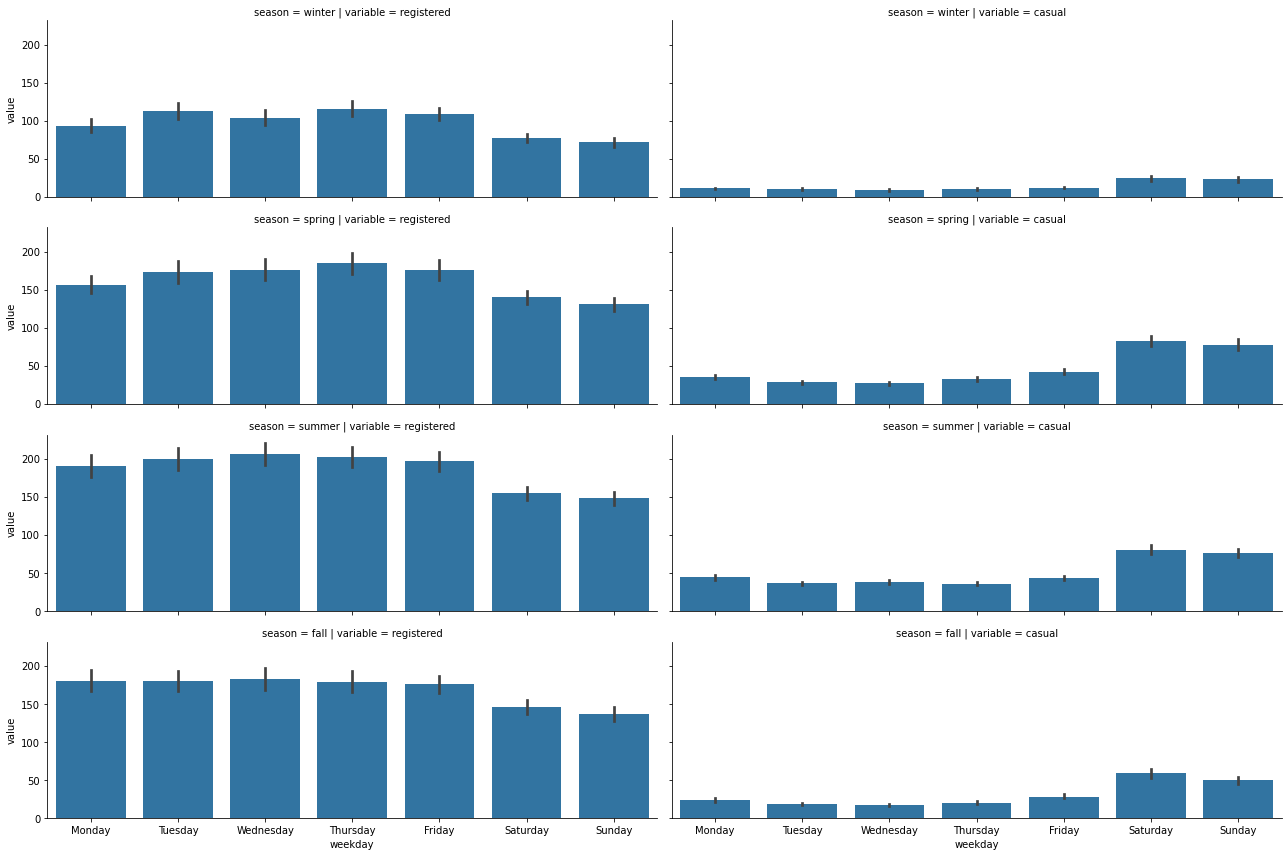

In [23]:
grid = sns.FacetGrid(plot_data,row='season',col='variable',aspect=3,\
                     row_order=['winter', 'spring','summer', 'fall'])
grid.map(sns.barplot,'weekday','value',\
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']);

As we expected before registered users are lower at weekends and casual users are higher.

## Estimating Average Registered Rides

This is our null hypothesis

In [24]:
population_mean = hour_df.registered.mean()
population_mean

153.78686920996606

In [25]:
# Get a sample of summer 2011
sample = hour_df[(hour_df.season == "summer") & (hour_df.yr == 2011)].registered

In [26]:
# Perform a t-teast
from scipy.stats import ttest_1samp
test = ttest_1samp(sample, population_mean)
print(f"Test statistic :{test[0]:0.4f}   .... P-Value :{test[1]:0.4f}")

Test statistic :-3.4920   .... P-Value :0.0005


This a biased data ....

P-Value is less than 0.05 .. So we can reject the null hypothesis and assume that the alternative hypothesis is correct.

But what if we use unbiased data ??

In [27]:
# Select a sample as 5% of the data
import random
random.seed(123)
new_sample = hour_df.registered.sample(frac=0.05)
test = ttest_1samp(new_sample, population_mean)
print(f"Test statistic :{test[0]:0.4f}   .... P-Value :{test[1]:0.4f}")

Test statistic :0.2625   .... P-Value :0.7930


P-Value is more than 0.05 .. So we can't reject the null hypothesis.

## Hypothesis Testing on Registered Rides

H_0 : average registered rides over weekdays-average registered rides over
weekend=0

H_a : average registered rides over weekdays-average registered rides over
weekend≠0

In [28]:
weekend_data = hour_df[(hour_df.weekday == "Saturday") | (hour_df.weekday == "Sunday")].registered
workday_data = hour_df[(hour_df.weekday != "Saturday") & (hour_df.weekday != "Sunday")].registered

In [29]:
# Perform t-test
from scipy.stats import ttest_ind
test = ttest_ind(weekend_data,workday_data)
print(f"Test statistic :{test[0]:0.4f}   .... P-Value :{test[1]:0.4f}")

Test statistic :-16.0036   .... P-Value :0.0000


P-Value is less than 0.05 .. So we can reject the null hypothesis and assume that the alternative hypothesis is correct.

C:\Users\BlueMoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BlueMoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


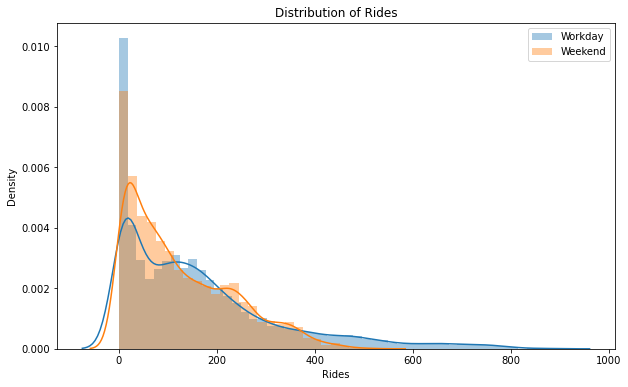

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(workday_data,label='Workday')
sns.distplot(weekend_data,label='Weekend')
plt.legend()
plt.title('Distribution of Rides')
plt.xlabel('Rides');

Let's do this again for casual users.

Test statistic :41.0767   .... P-Value :0.0000


C:\Users\BlueMoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BlueMoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


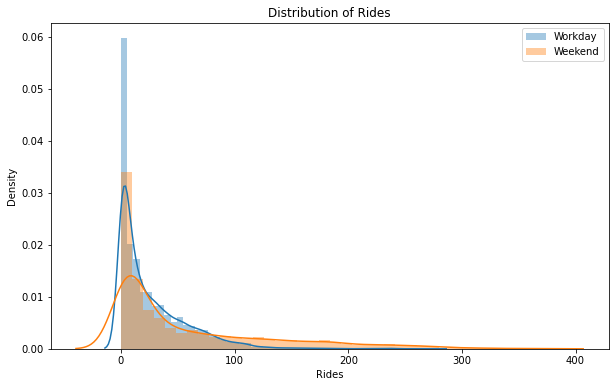

In [31]:
weekend_data = hour_df[(hour_df.weekday == "Saturday") | (hour_df.weekday == "Sunday")].casual
workday_data = hour_df[(hour_df.weekday != "Saturday") & (hour_df.weekday != "Sunday")].casual

test = ttest_ind(weekend_data,workday_data)
print(f"Test statistic :{test[0]:0.4f}   .... P-Value :{test[1]:0.4f}")

plt.figure(figsize=(10,6))
sns.distplot(workday_data,label='Workday')
sns.distplot(weekend_data,label='Weekend')
plt.legend()
plt.title('Distribution of Rides')
plt.xlabel('Rides');

we can say that there is a statistically significant difference between the number of rides on working days and weekend days for both casual and registered users.

## Analysis of Weather-Related Features

In [32]:
# Define a function to calculate the correlation and plot it
def corr_plot(data,col):
    plt.figure(figsize=(10,6))
    # corraltion of col and registered users
    corr_r = np.corrcoef(data[col],data['registered'])[0,1]
    sns.regplot(x=col, y='registered', data = data ,label= f"Registered correlation {corr_r:0.2f}",\
               scatter_kws={"alpha":0.5})
    
    # corraltion of col and casual users
    corr_r = np.corrcoef(data[col],data['casual'])[0,1]
    sns.regplot(x=col, y='casual', data = data ,label= f"Casual correlation {corr_r:0.2f}",\
               scatter_kws={"alpha":0.5})
    
    plt.legend()
    plt.title(f"Correlation between rides and {col}")
    plt.ylabel('Rides')

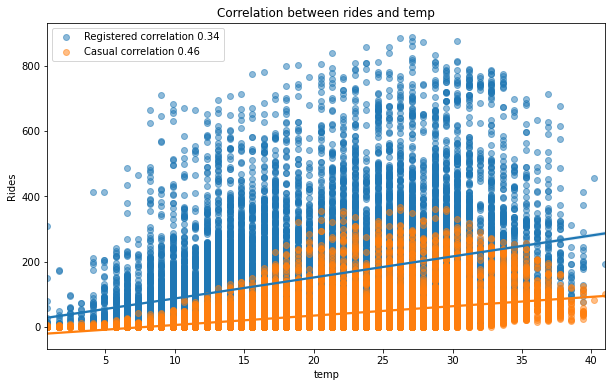

In [33]:
# Correlation between rides and temp
corr_plot(hour_df,'temp')

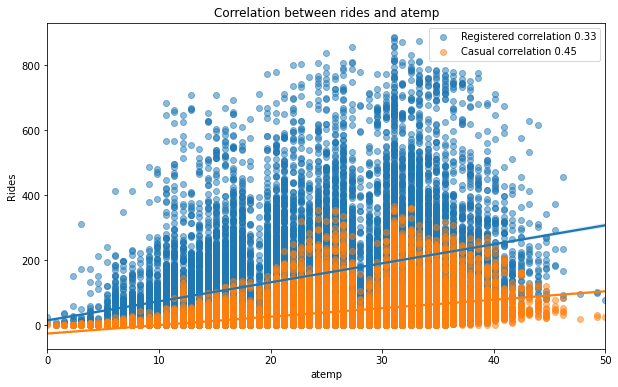

In [34]:
# Correlation between rides and atemp
corr_plot(hour_df,'atemp')

We can observe that higher temperatures have a positive impact on the number of rides.

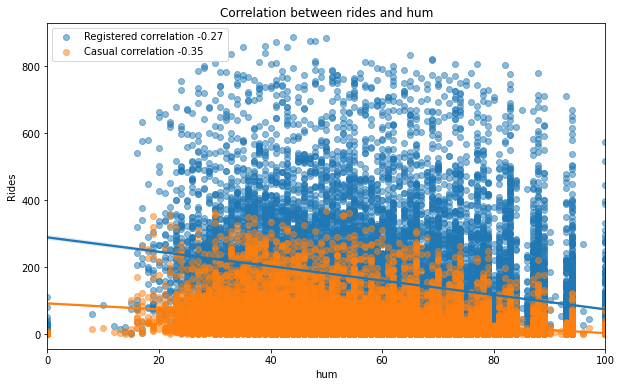

In [35]:
corr_plot(hour_df,'hum')

Here there is a negative impact between humidity and the number of rides.

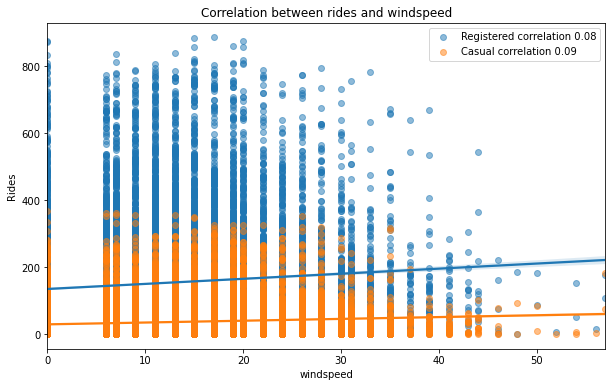

In [36]:
corr_plot(hour_df,'windspeed')

Wind speed has little effect on the number of rides.